## Time Series - ARIMA

Time series analysis by ARIMA Considering the dataset “Bike Sharing Dataset” available in the UCI Machine Learning repository, at https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset.

Considering only aggregated bicycle rental data (variable “cnt”). Starting from daily data, convert to weekly granularity. Data only up to the end of July 2012 were considered.

Goals:
- Applying an ARIMA model, forecast the weekly demand for bicycles for the next 6 weeks - August and the first half of September 2012.

## Load packages

In [27]:
# Clear data in environment
rm(list = ls()) 
graphics.off()
library(xts)
library(dplyr)
library(forecast)

## Load dataset

In [2]:
url = "https://raw.githubusercontent.com/E-man85/ML-R/main/03-data/bikeSharingDay.csv"
bike <- read.csv(url)

## Prepare dataset

In [3]:
bike <- bike %>% select(dteday, cnt) # selects 2 columns from the dataset 'dteday' and 'cnt'
bike$dteday <- as.Date(bike$dteday) # turn variable dteday into date
names(bike)[which(names(bike) == "dteday")] <- "date" # rename column dteday to date
names(bike)[which(names(bike) == "cnt")]    <- "count" # rename column cnt to count

## Dataset details

In [4]:
str(bike) # object structure
head(bike) # first rows 
tail(bike) # last rows

'data.frame':	731 obs. of  2 variables:
 $ date : Date, format: "2011-01-01" "2011-01-02" ...
 $ count: int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


,date,count
,<date>,<int>
1,2011-01-01,985
2,2011-01-02,801
3,2011-01-03,1349
4,2011-01-04,1562
5,2011-01-05,1600
6,2011-01-06,1606


,date,count
,<date>,<int>
726,2012-12-26,441
727,2012-12-27,2114
728,2012-12-28,3095
729,2012-12-29,1341
730,2012-12-30,1796
731,2012-12-31,2729


## View line plot

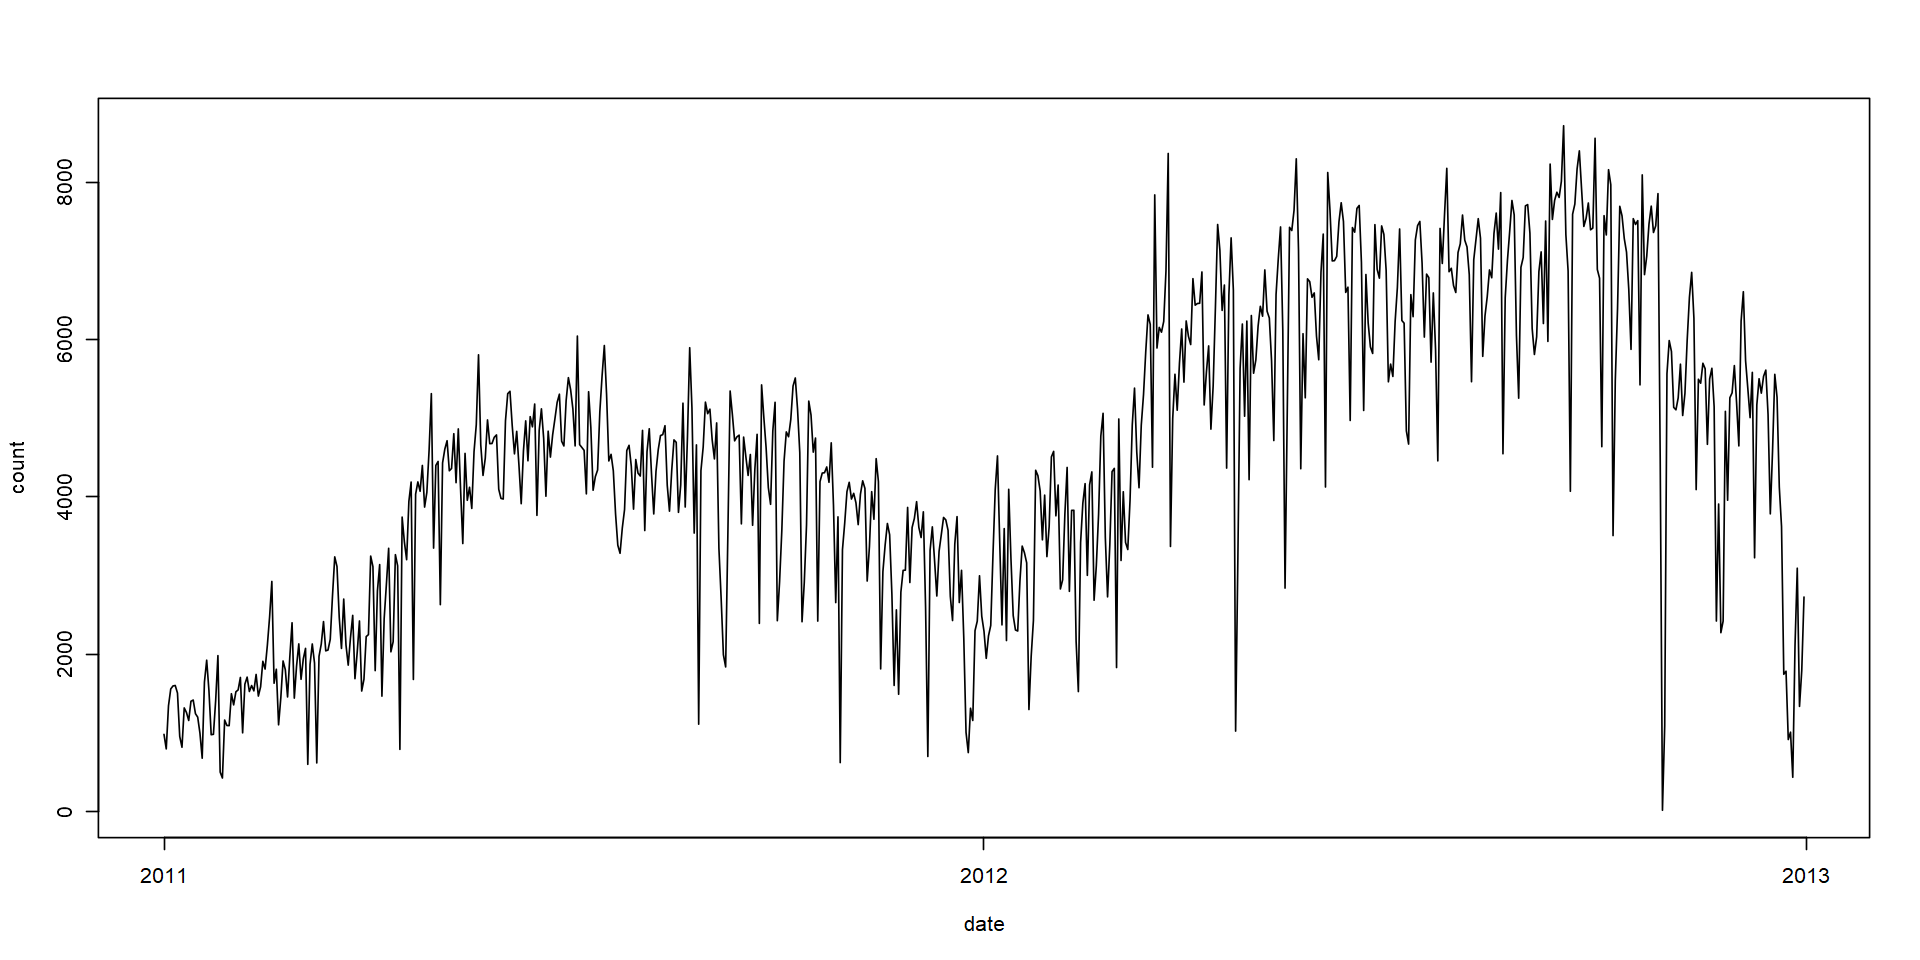

In [5]:
options(repr.plot.width=16, repr.plot.height=8)
plot(bike, type = "l")# see linear chart

## Compare different granularities

In [6]:
#converts the array "bike$count" into a time series object of type xts.
bike_daily <- xts::as.xts(bike$count, order.by = as.Date(bike$date)) 
#sum of daily values for each week will be calculated
bike_weekly  <- xts::apply.weekly(bike_daily, sum)
#sum of daily values for each month will be calculated
bike_monthly <- xts::apply.monthly(bike_daily, sum)
head(bike_daily) 
head(bike_weekly)
head(bike_monthly)

           [,1]
2011-01-01  985
2011-01-02  801
2011-01-03 1349
2011-01-04 1562
2011-01-05 1600
2011-01-06 1606

            [,1]
2011-01-02  1786
2011-01-09  9408
2011-01-16  9025
2011-01-23  8770
2011-01-30  7699
2011-02-06 10273

             [,1]
2011-01-31  38189
2011-02-28  48215
2011-03-31  64045
2011-04-30  94870
2011-05-31 135821
2011-06-30 143512

## Plot the variables time series

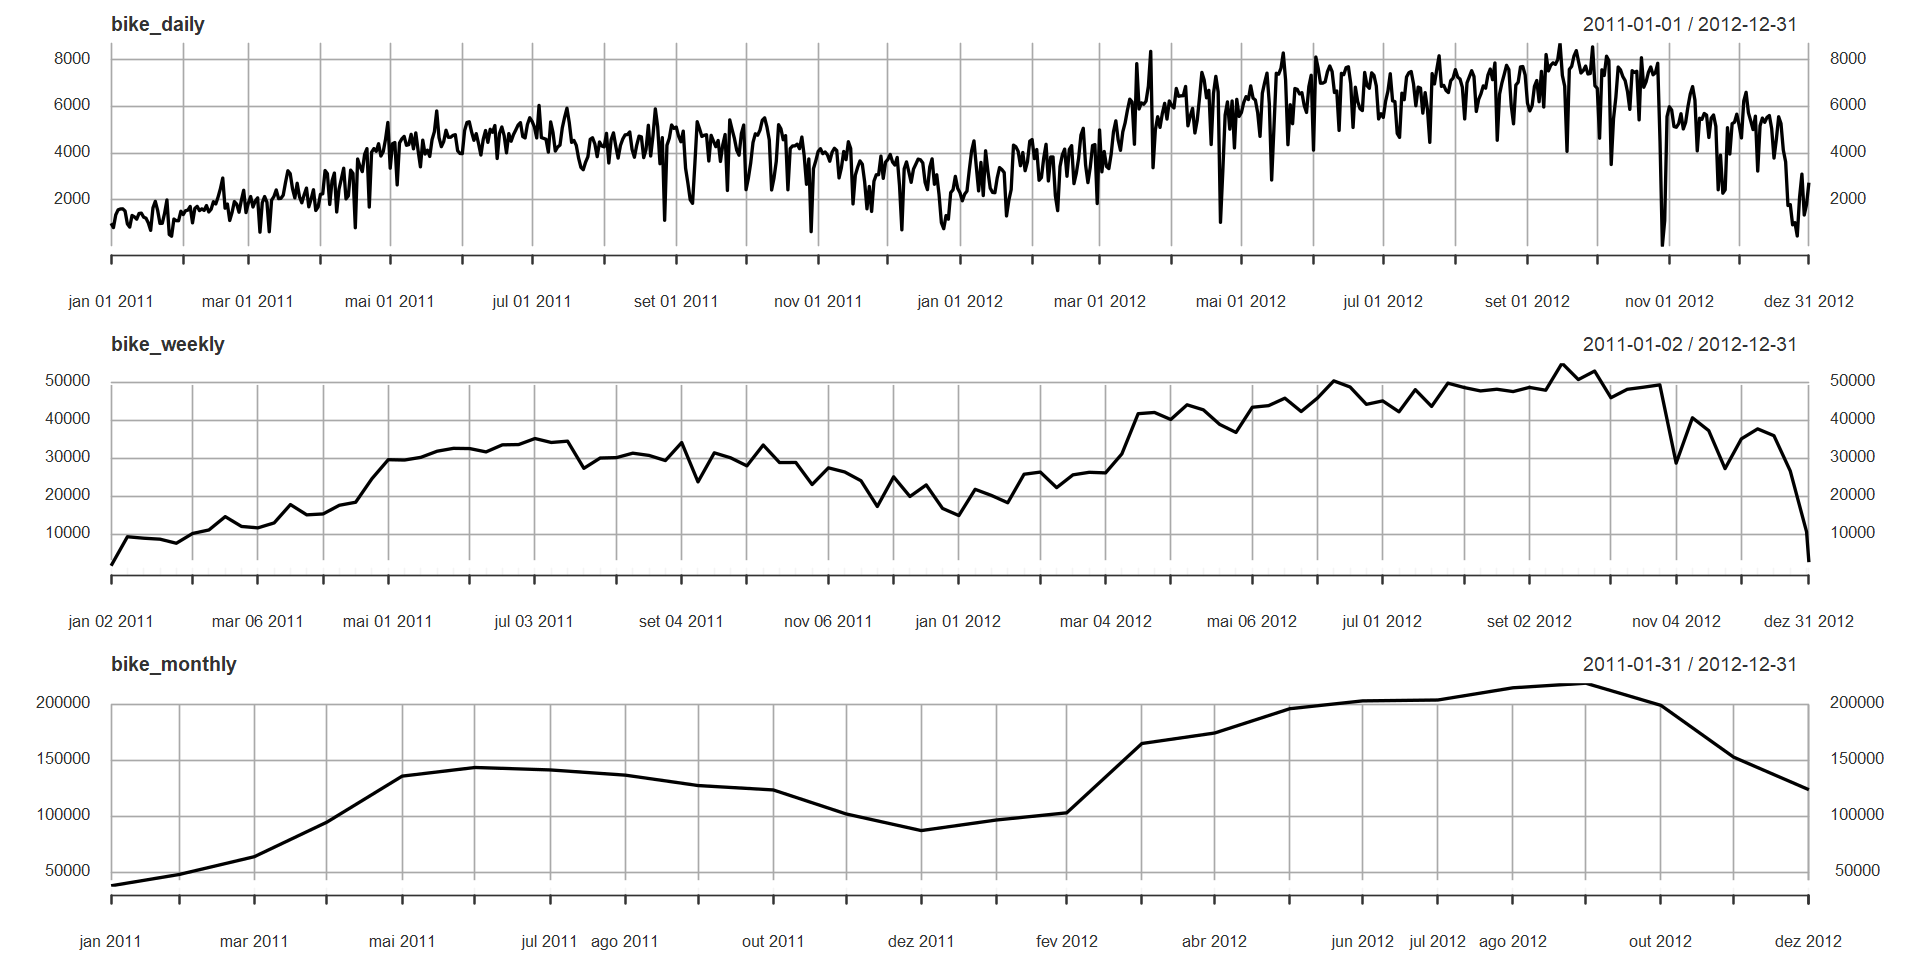

In [7]:
par(mfrow = c(3,1))
plot(bike_daily)
plot(bike_weekly)
plot(bike_monthly)

## Select a date granularity

,date,count
,<date>,<int>
1,2011-01-02,1786
2,2011-01-09,9408
3,2011-01-16,9025
4,2011-01-23,8770
5,2011-01-30,7699
6,2011-02-06,10273


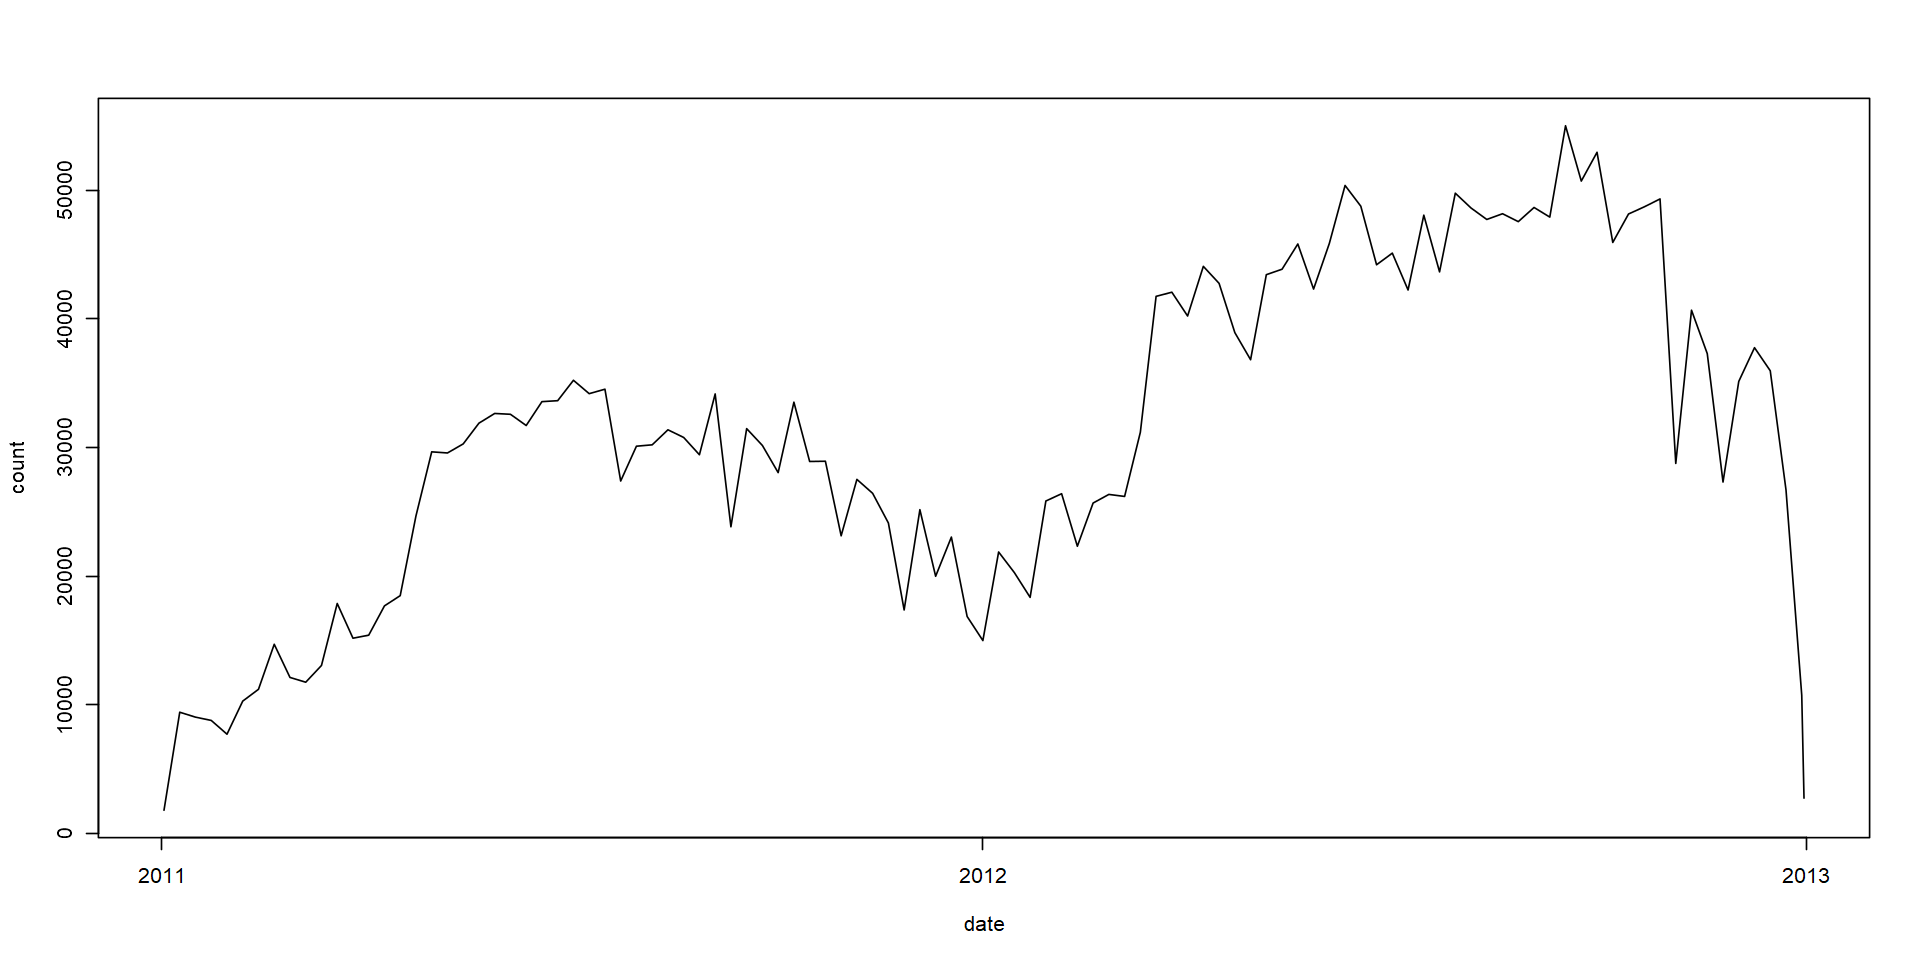

In [8]:
bike <- data.frame(date = index(bike_weekly),
                   count = bike_weekly)
rownames(bike) <- NULL
plot(bike, type = "l")
head(bike)

## Select data until July 2012

In [9]:
bike07_2012 <- subset(bike, bike$date < '2012-08-01')

## Convert to time series

In [10]:
# create time-series object, frequency is the number of observation per unit of time
bike07_2012.ts <- ts(data = bike07_2012$count, frequency = 7) 
class(bike07_2012.ts) # confirm the object class
print(bike07_2012.ts) # see the time series

[1] "ts"

Time Series:
Start = c(1, 1) 
End = c(12, 6) 
Frequency = 7 
 [1]  1786  9408  9025  8770  7699 10273 11192 14692 12113 11742 13045 17865
[13] 15165 15402 17680 18476 24676 29661 29573 30278 31893 32646 32582 31709
[25] 33565 33640 35226 34186 34533 27393 30099 30206 31375 30779 29435 34162
[37] 23834 31465 30155 28045 33522 28911 28930 23132 27518 26434 24126 17364
[49] 25160 19985 23029 16855 14982 21871 20266 18342 25838 26403 22320 25679
[61] 26349 26192 31185 41755 42077 40226 44087 42764 38934 36826 43440 43867
[73] 45828 42323 45867 50380 48765 44212 45116 42250 48068 43659 49778


## Decompose TS into seasonal, trend, and irregular components

$x
Time Series:
Start = c(1, 1) 
End = c(12, 6) 
Frequency = 7 
 [1]  1786  9408  9025  8770  7699 10273 11192 14692 12113 11742 13045 17865
[13] 15165 15402 17680 18476 24676 29661 29573 30278 31893 32646 32582 31709
[25] 33565 33640 35226 34186 34533 27393 30099 30206 31375 30779 29435 34162
[37] 23834 31465 30155 28045 33522 28911 28930 23132 27518 26434 24126 17364
[49] 25160 19985 23029 16855 14982 21871 20266 18342 25838 26403 22320 25679
[61] 26349 26192 31185 41755 42077 40226 44087 42764 38934 36826 43440 43867
[73] 45828 42323 45867 50380 48765 44212 45116 42250 48068 43659 49778

$seasonal
Time Series:
Start = c(1, 1) 
End = c(12, 6) 
Frequency = 7 
 [1] 1554.94063 -716.70872 -623.76067  -30.83859  351.53803 -184.47495
 [7] -350.69573 1554.94063 -716.70872 -623.76067  -30.83859  351.53803
[13] -184.47495 -350.69573 1554.94063 -716.70872 -623.76067  -30.83859
[19]  351.53803 -184.47495 -350.69573 1554.94063 -716.70872 -623.76067
[25]  -30.83859  351.53803 -184.47495 -350.6957

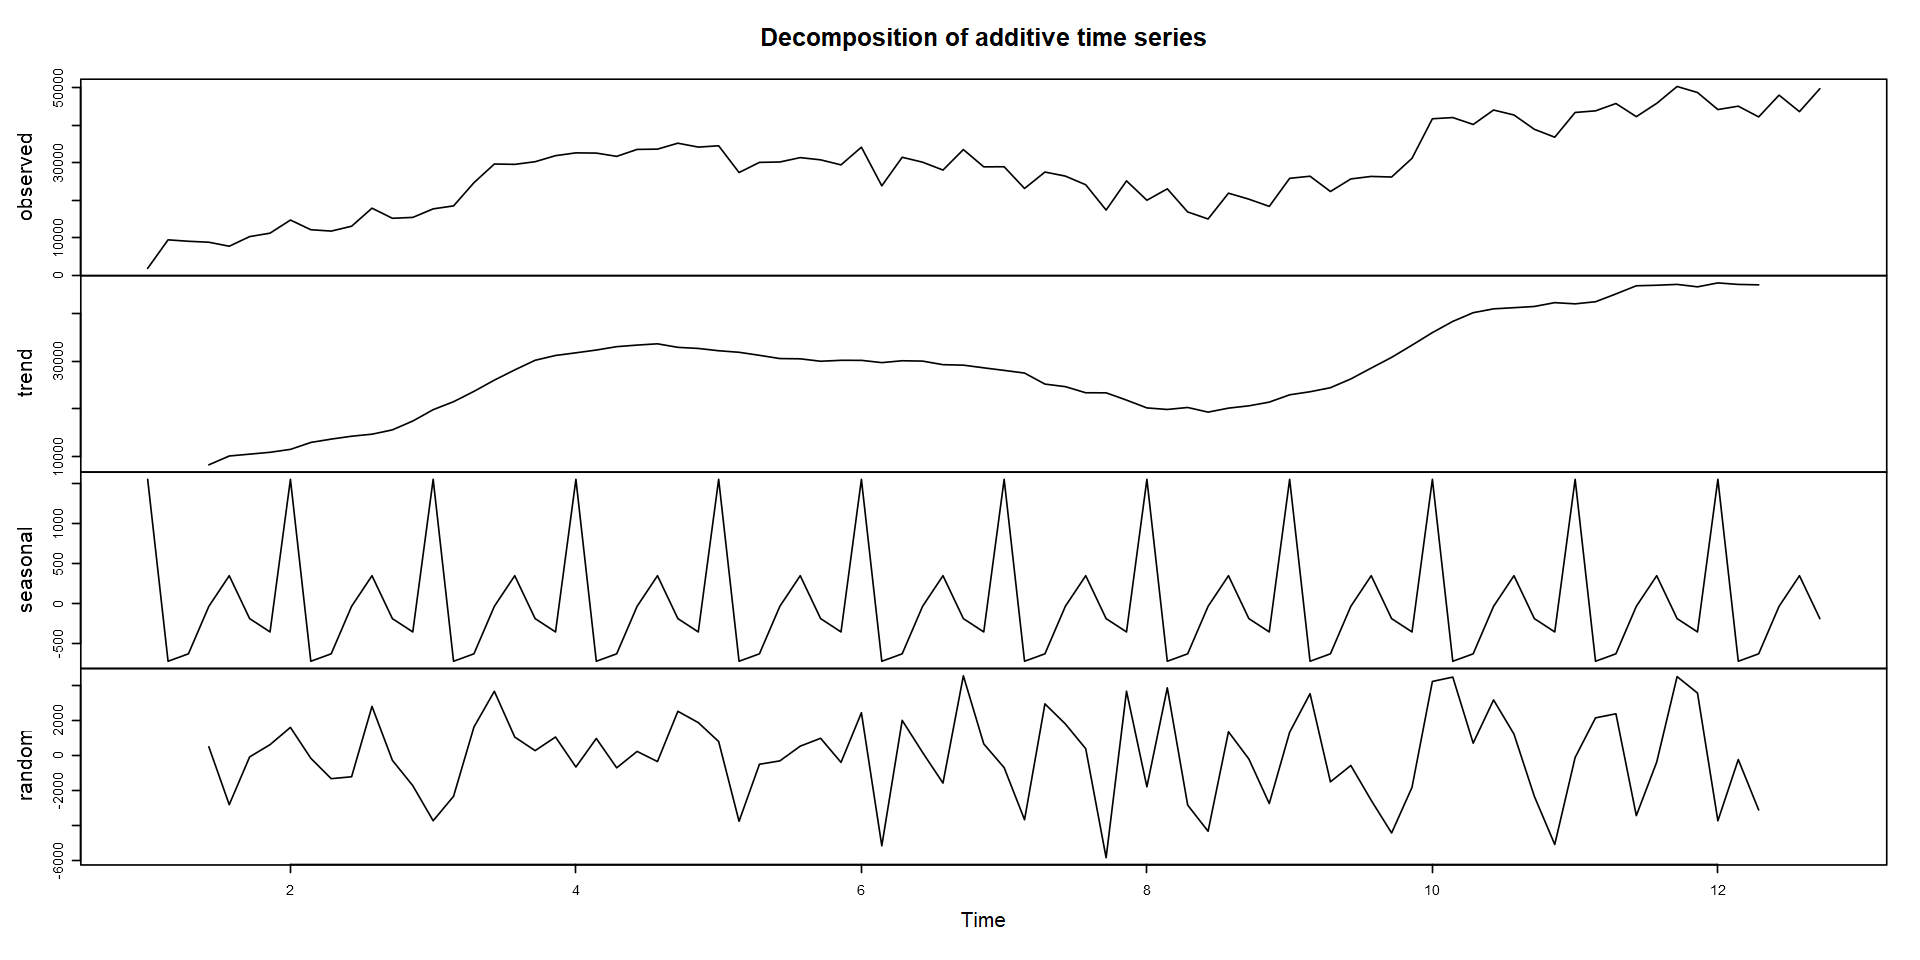

In [11]:
# Decompose a time series into seasonal, trend and irregular components(using moving averages)
bike07_2012.dec <- decompose(bike07_2012.ts) 
# see the multiple components
bike07_2012.dec 
# see on a chart
plot(bike07_2012.dec)

## Set ARIMA parameters
Convert the non-stationary series into a stationary series by differentiating

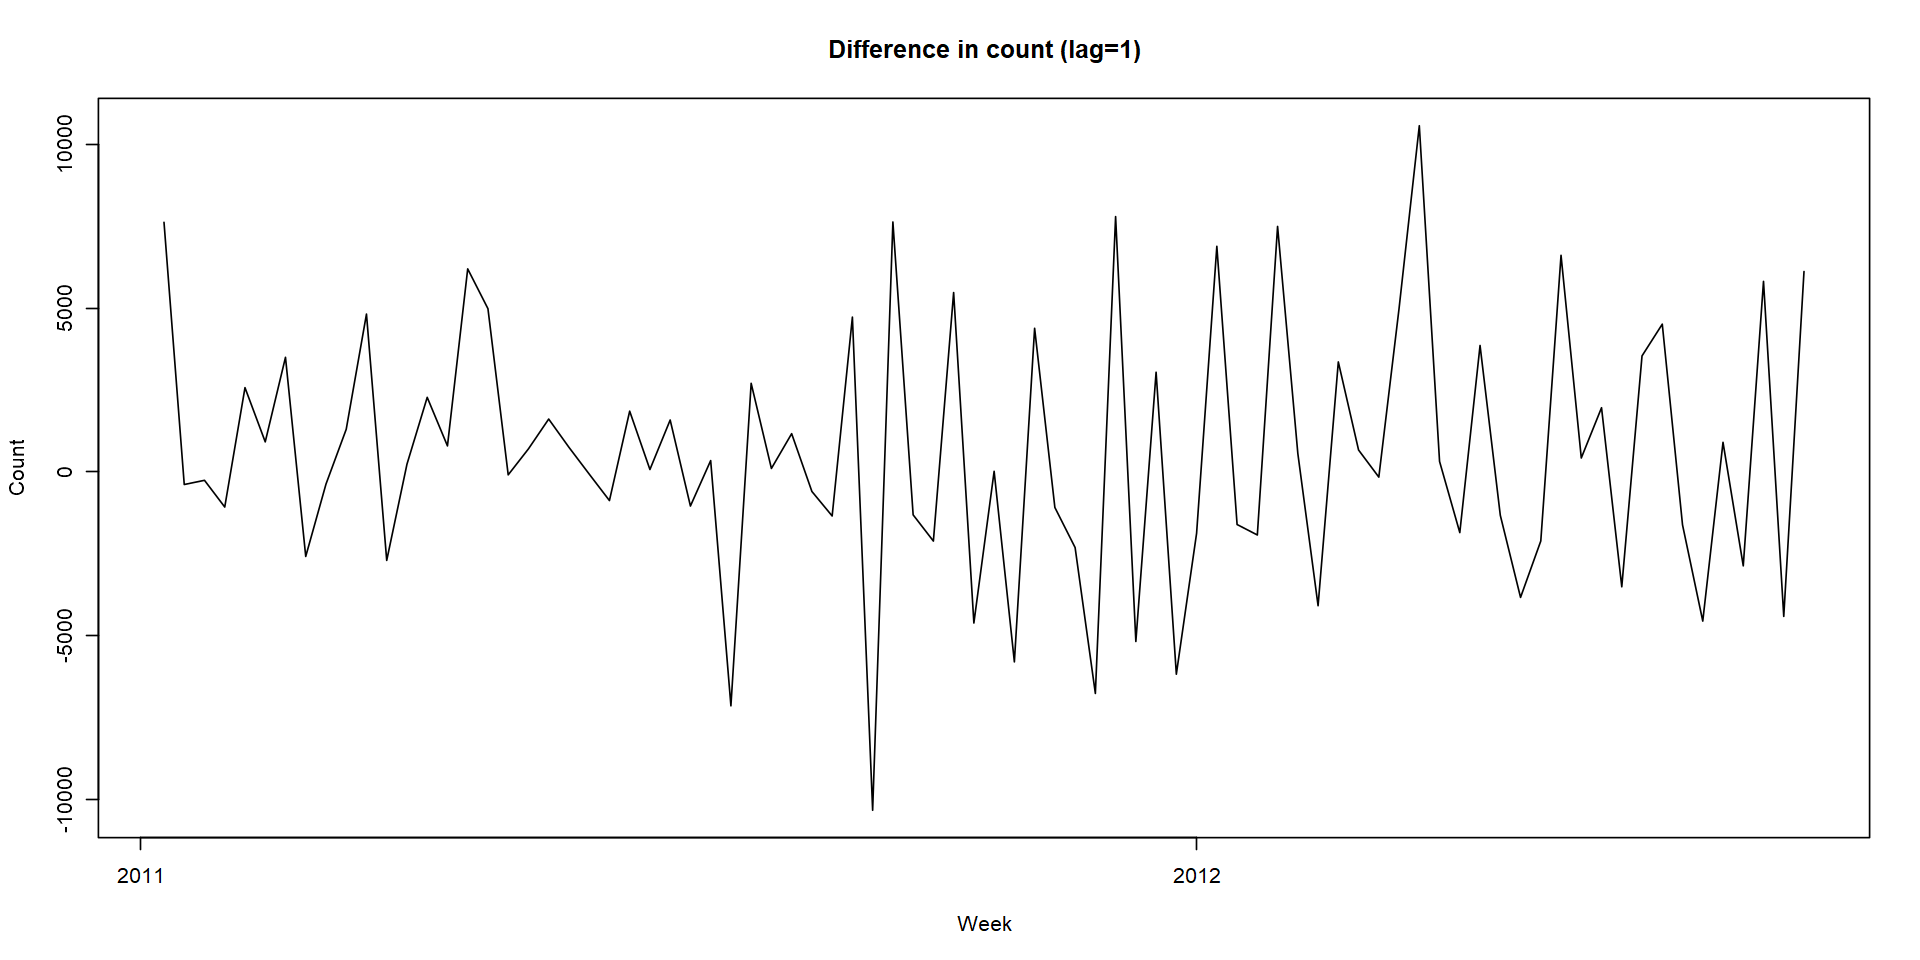

In [12]:
# Plot diference count
plot(x = bike07_2012$date[-1], # remover first week
     y = diff(bike07_2012$count), # lag = 1
     type = "l", # line chart
     xlab = "Week",
     ylab = "Count",
     main = "Difference in count (lag=1)")

The non-stationary time series was converted into a stationary time series through the difference between the variable count.

Visual analysis suggests that lag=1 results in stationary time series.

We can consider the order of d to be 1

In [13]:
d <- 1 

## Value MA (q) parameter
See correlation between observations in a time series at different lags

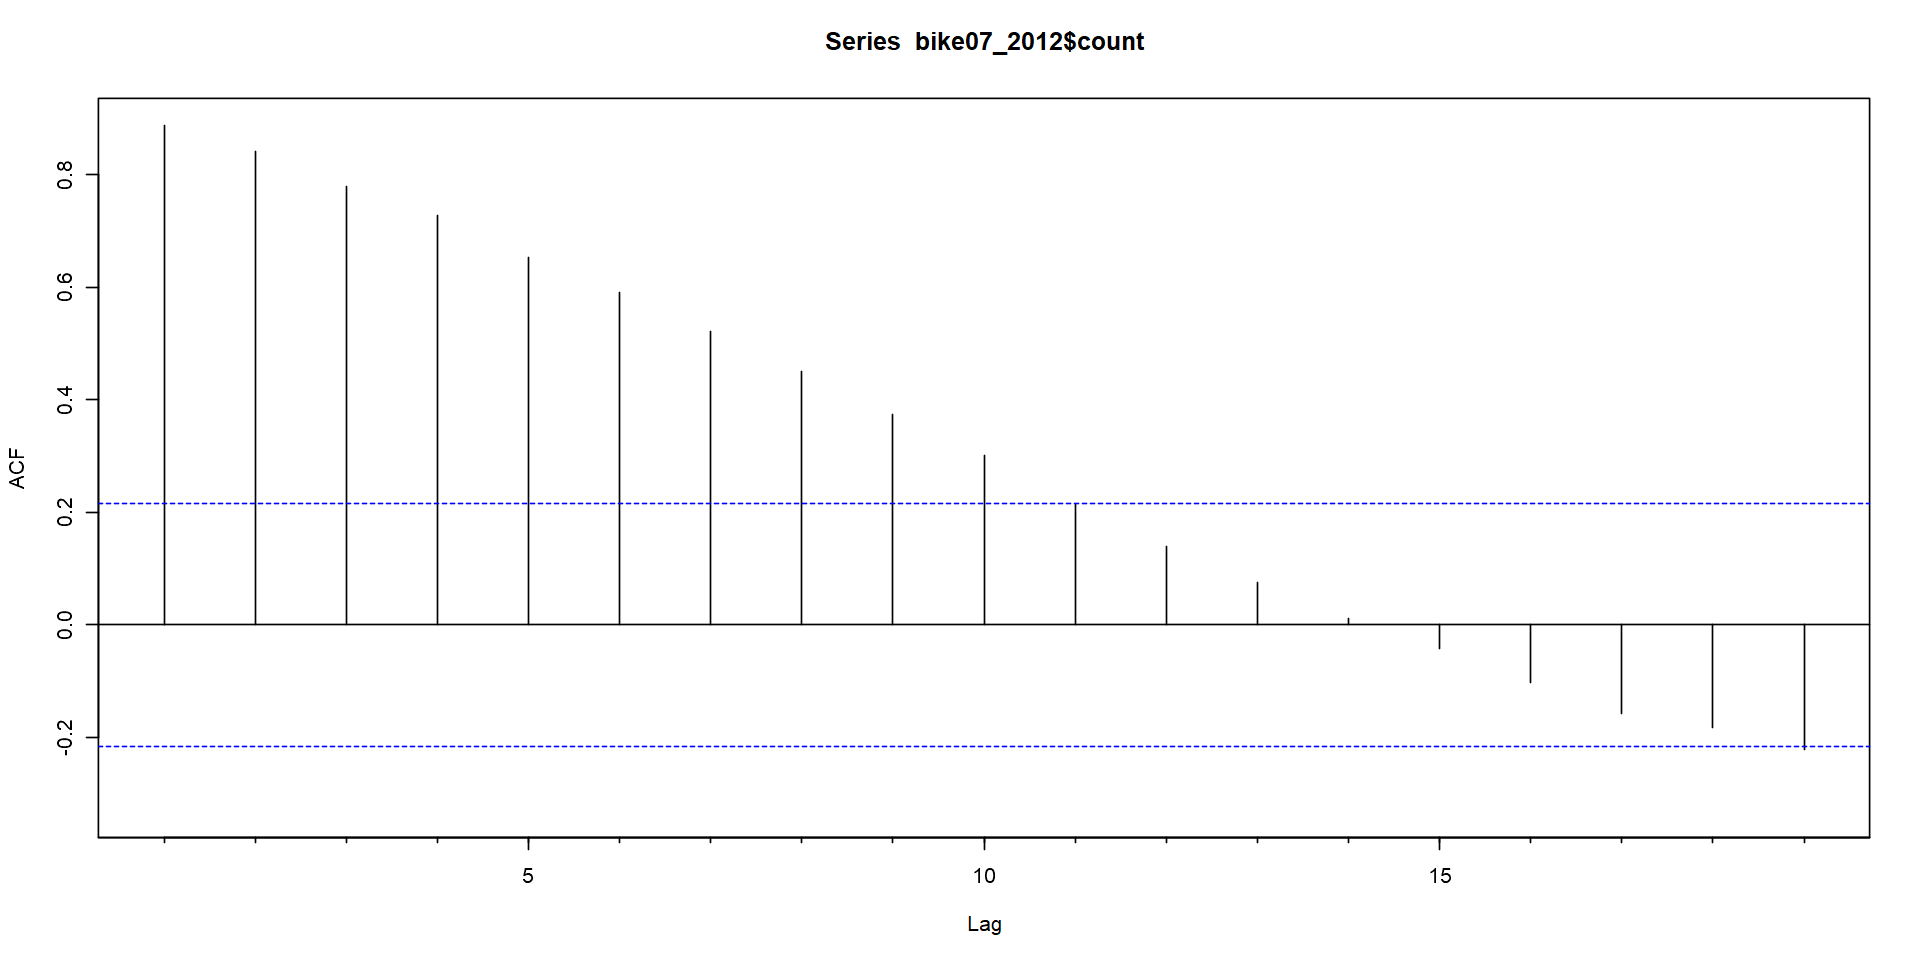

In [14]:
# Auto-correlation plot
forecast::Acf(bike07_2012$count)

There is a positive correlation up to 10 Lag of the time series.

However, correlation is significant only for the first 5 to 6 lags.

Let’s assume that the order of q is 5

In [15]:
q <- 5

## AR(p) parameter
Plot a correlation between the time series and its delay.

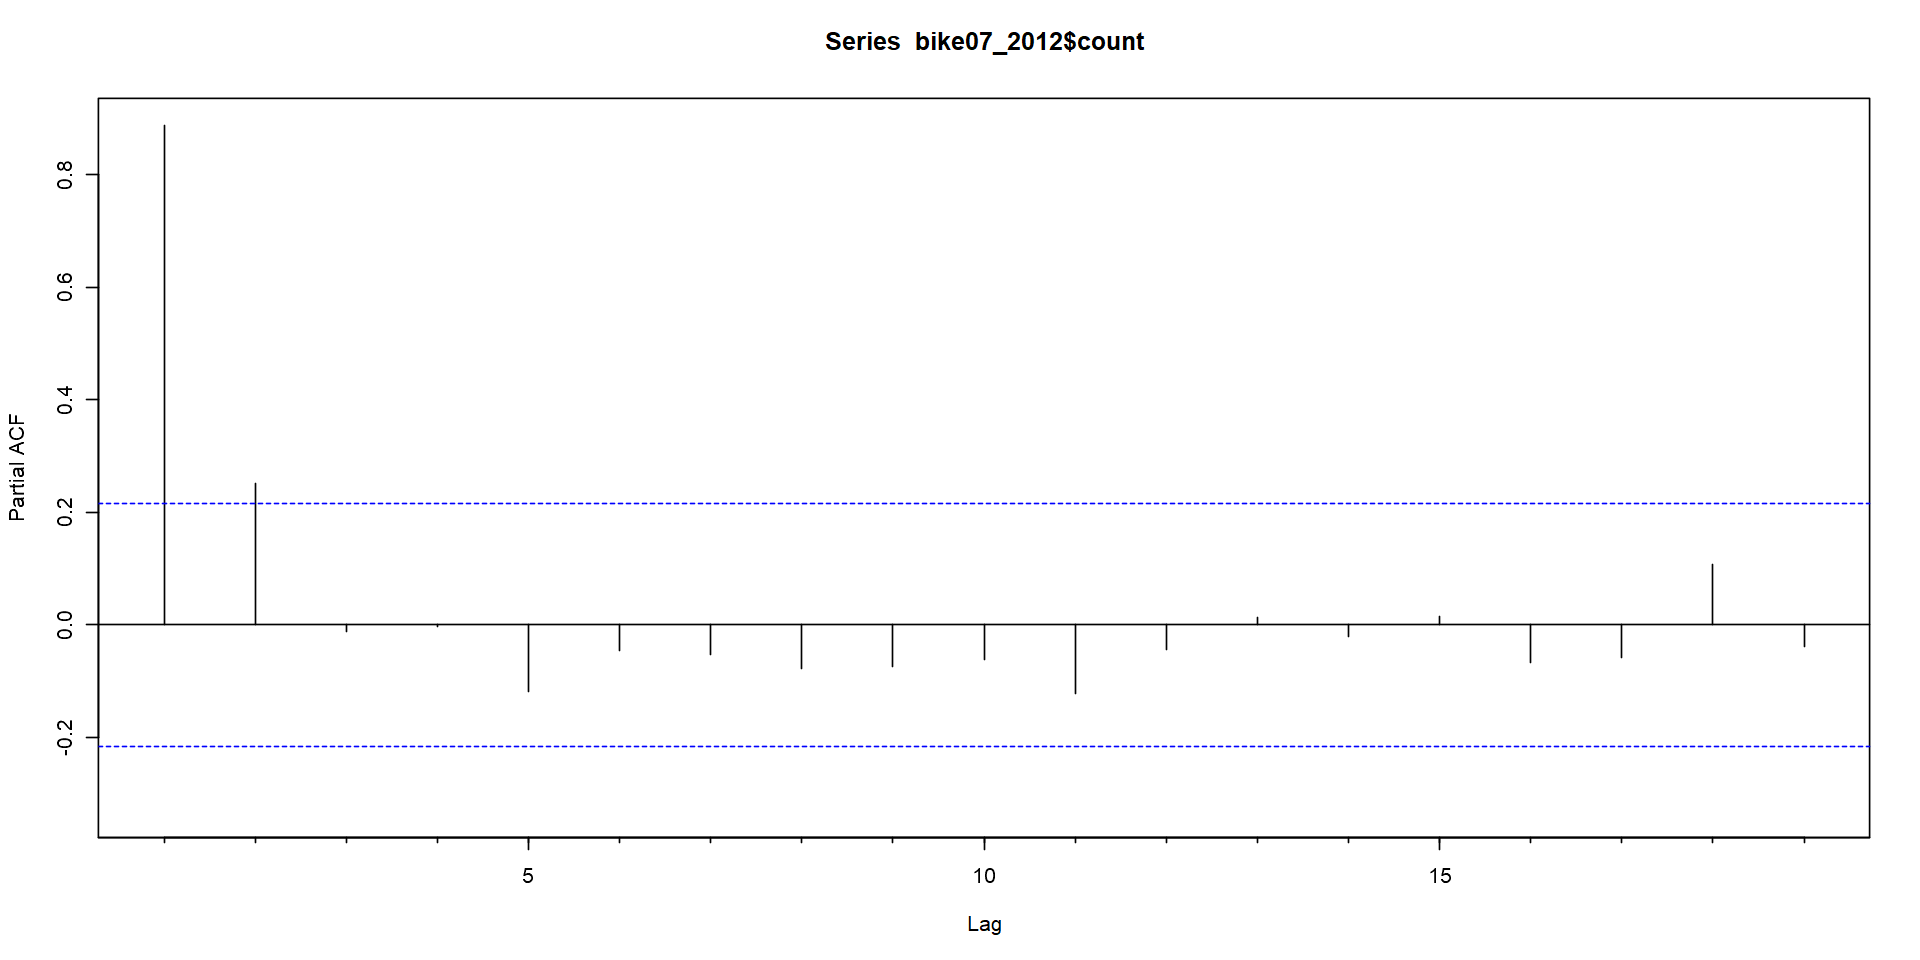

In [16]:
forecast::Acf(bike07_2012$count, type = "partial")

It can be noted that the first 2 lags are outside the significance limit.

The correlation is significan for the first lag.

Let’s assume that the order of p is 1.

In [17]:
p <- 1

## Fit model (manually)

In [18]:
fit.arima <- Arima(bike07_2012.ts, order = c(p, d, q))
summary(fit.arima)

Series: bike07_2012.ts 
ARIMA(1,1,5) 

Coefficients:
          ar1      ma1     ma2     ma3     ma4      ma5
      -0.0936  -0.2489  0.0494  0.0373  0.1065  -0.0476
s.e.   0.9878   0.9790  0.3674  0.1450  0.1137   0.1493

sigma^2 = 14860428:  log likelihood = -790.41
AIC=1594.82   AICc=1596.34   BIC=1611.67

Training set error measures:
                  ME     RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 688.724 3688.786 2806.043 2.385116 11.39434 0.4314866 -0.0209353

## Check residuals


	Ljung-Box test

data:  Residuals from ARIMA(1,1,5)
Q* = 6.5258, df = 8, p-value = 0.5885

Model df: 6.   Total lags used: 14



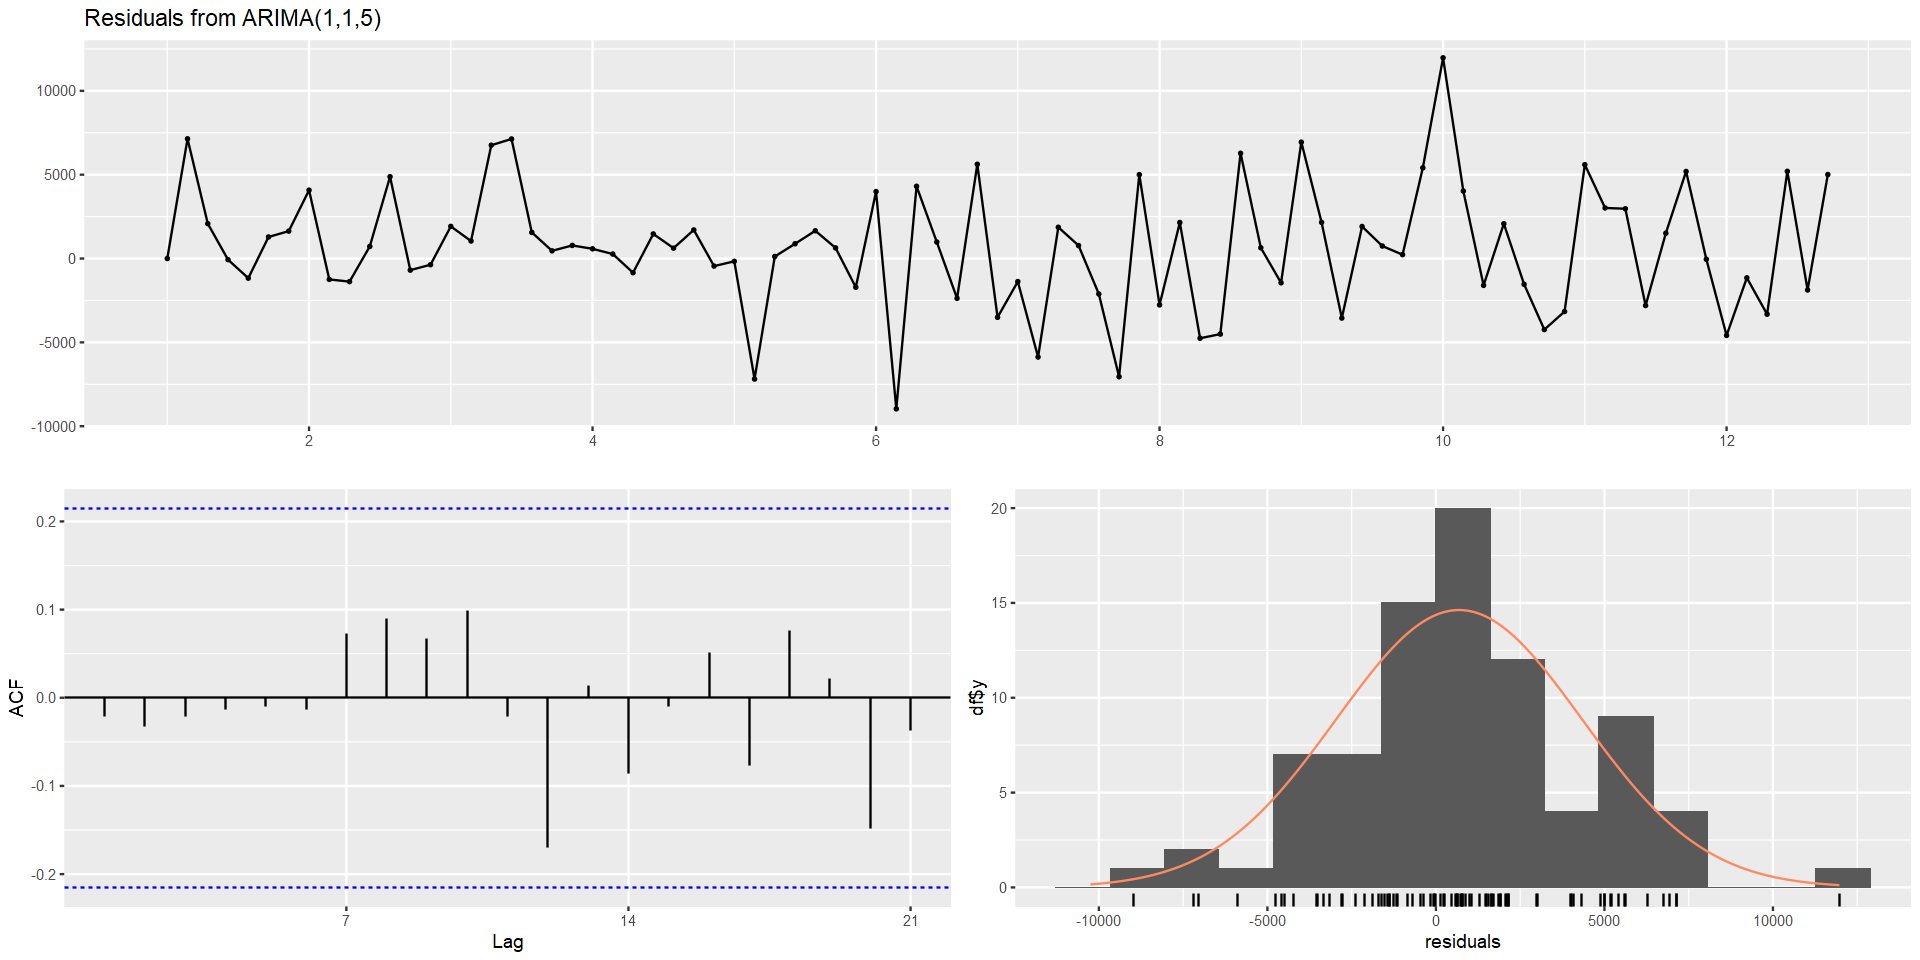

In [19]:
checkresiduals(fit.arima)

## Forecast for the next 6 weeks

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
12.85714       47760.66 42820.38 52700.94 40205.15 55316.17
13.00000       48839.47 42927.05 54751.88 39797.21 57881.72
13.14286       48477.86 41529.23 55426.49 37850.85 59104.87
13.28571       49134.78 41216.25 57053.31 37024.44 61245.13
13.42857       48834.63 39819.20 57850.06 35046.72 62622.53
13.57143       48862.73 38988.98 58736.48 33762.12 63963.33

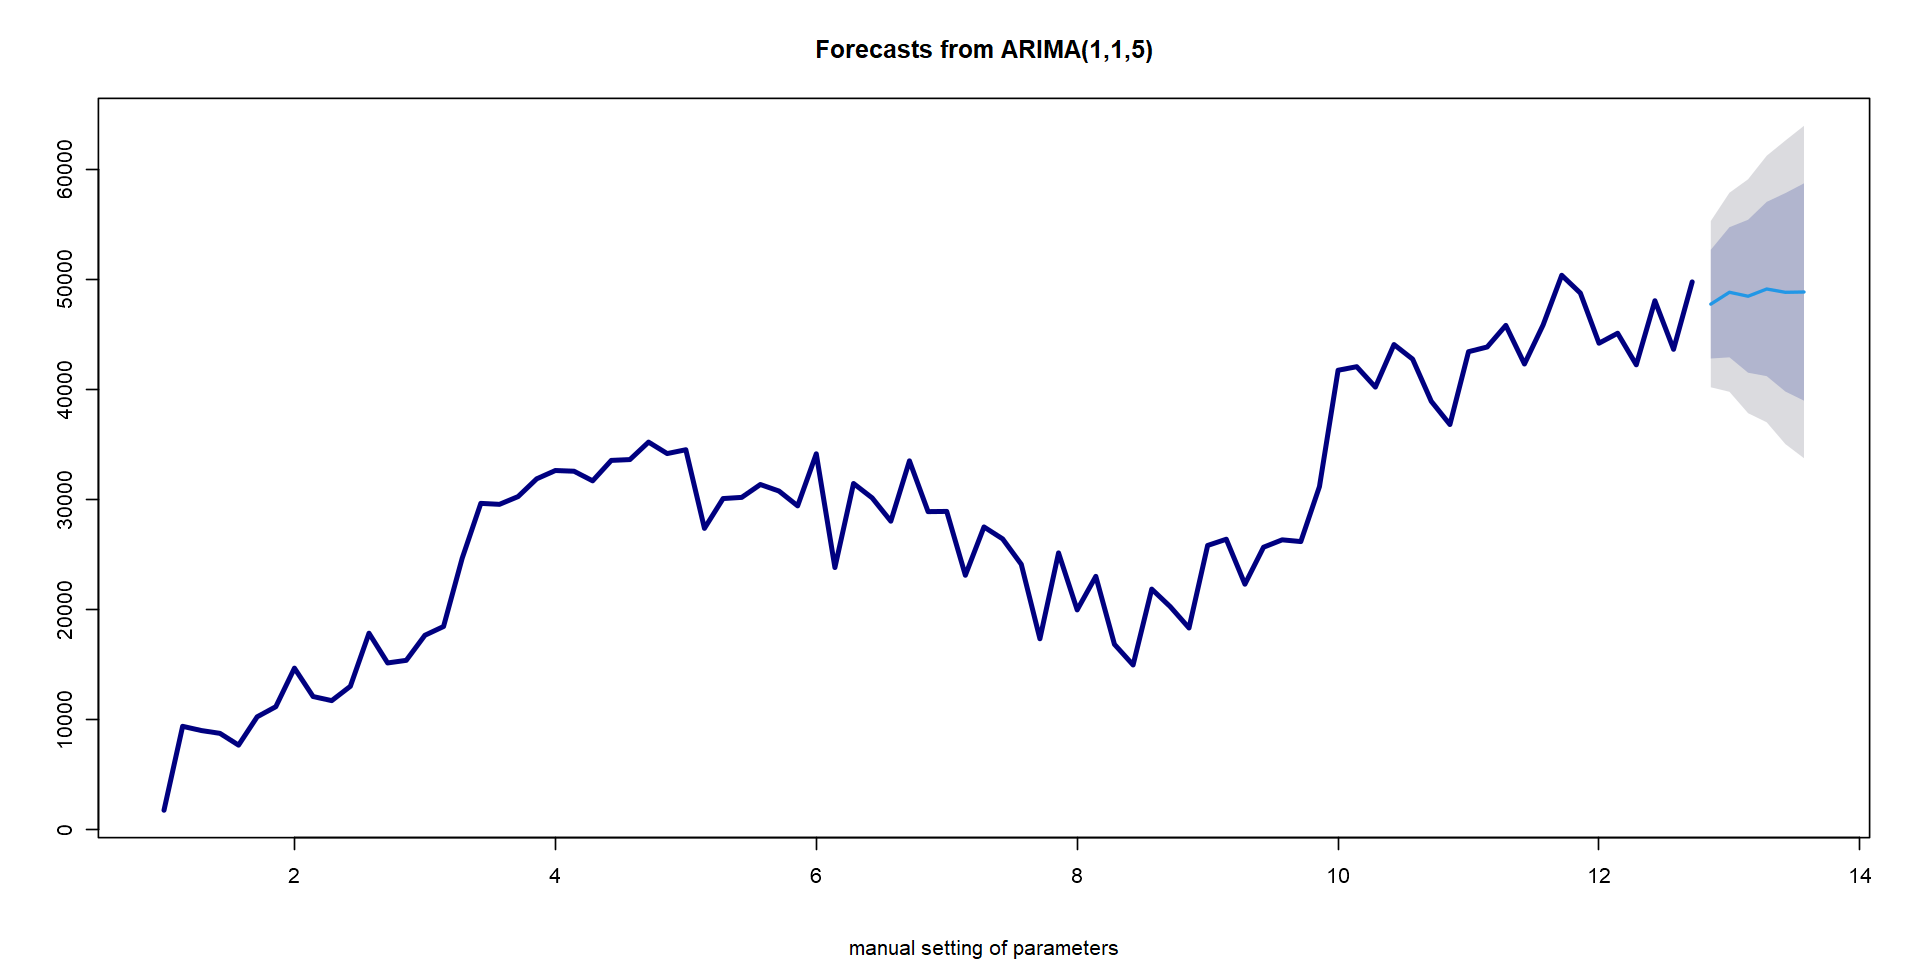

In [20]:
predict.arima <- forecast(fit.arima, h = 6) 
# h= next 6 weeks
plot(predict.arima,
     sub = "manual setting of parameters",
     col = "navyblue",
     lwd = 3)
predict.arima # See forecasts in table

## Fit model - (auto)

Series: bike07_2012.ts 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.3212
s.e.   0.1082

sigma^2 = 14251027:  log likelihood = -791.27
AIC=1586.54   AICc=1586.69   BIC=1591.35

Training set error measures:
                   ME     RMSE      MAE      MPE    MAPE      MASE        ACF1
Training set 735.4035 3729.293 2881.341 2.560397 11.8694 0.4430652 -0.04254173


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 7.0229, df = 13, p-value = 0.901

Model df: 1.   Total lags used: 14



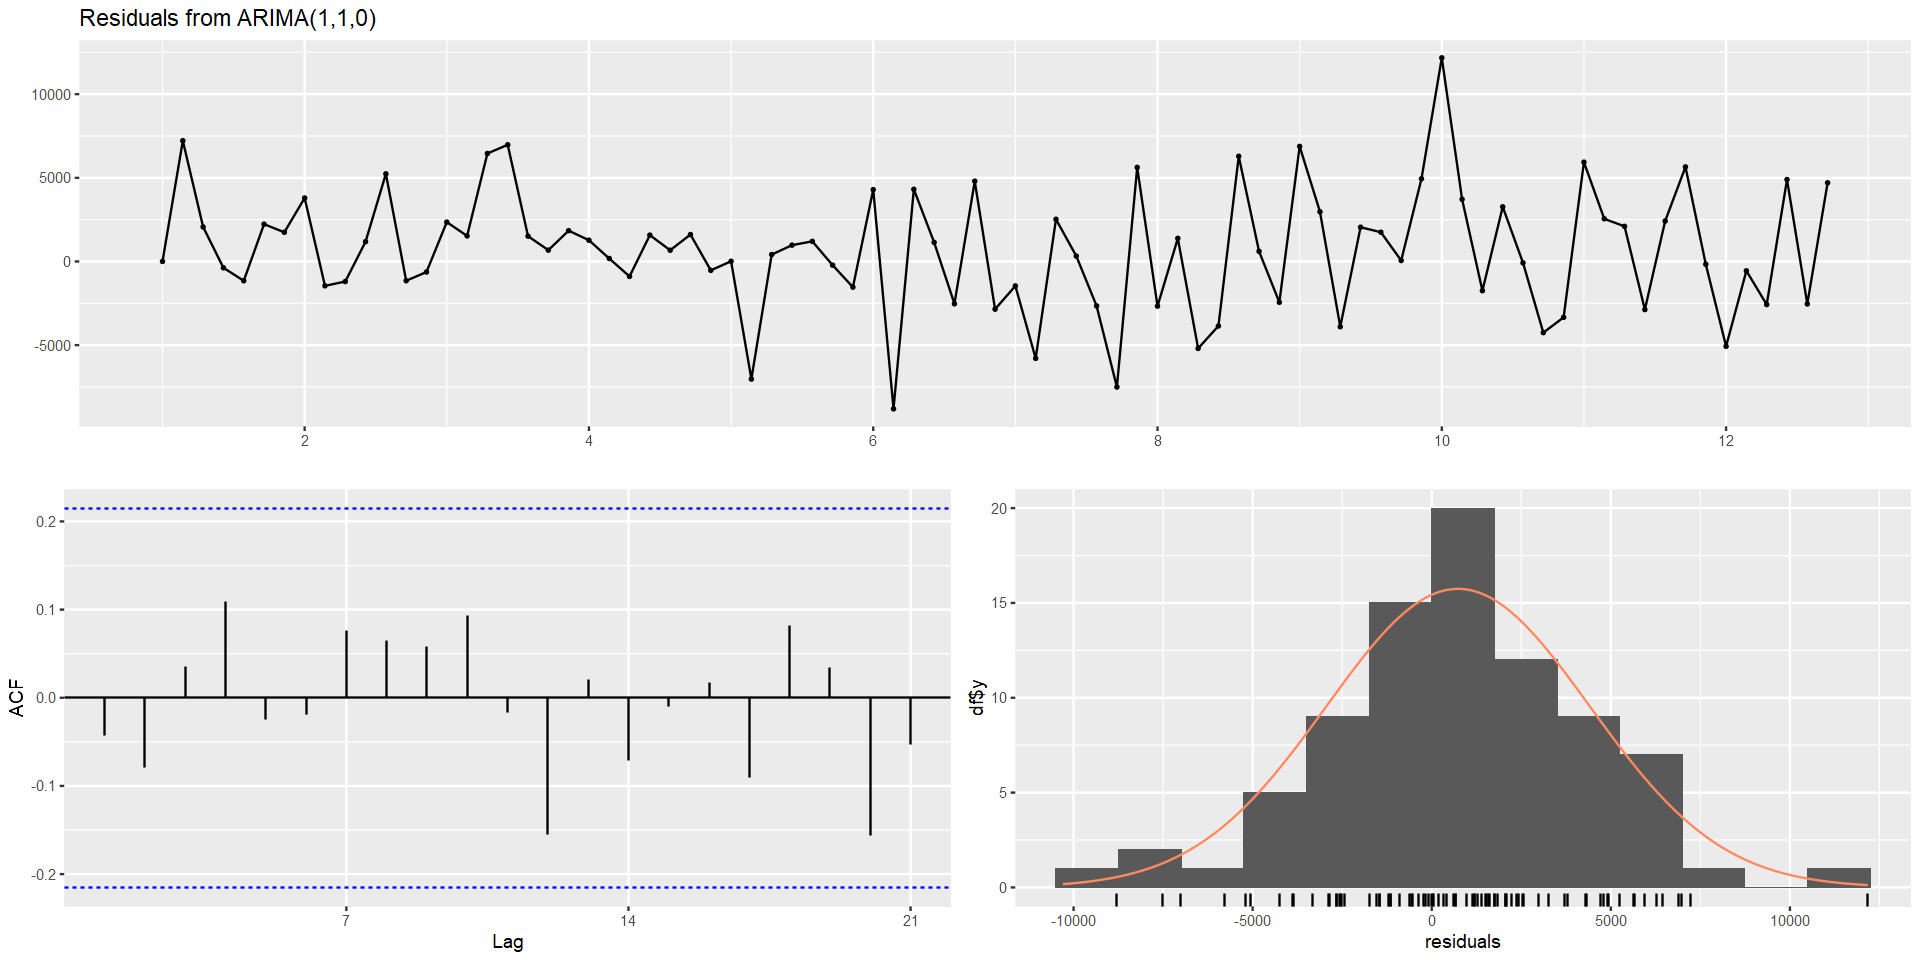

In [21]:
# Fit model with Auto-ARIMA
fit.arima.auto <- auto.arima(bike07_2012.ts, 
                              seasonal = FALSE,
                              allowdrift = FALSE)
summary(fit.arima.auto)
checkresiduals(fit.arima.auto) # Check residuals

## Forecast for the next 6 weeks (autoArima)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
12.85714       47812.74 42974.81 52650.66 40413.77 55211.70
13.00000       48443.93 42596.63 54291.23 39501.26 57386.60
13.14286       48241.21 41276.78 55205.63 37590.04 58892.37
13.28571       48306.31 40455.94 56156.69 36300.20 60312.43
13.42857       48285.40 39617.69 56953.12 35029.28 61541.53
13.57143       48292.12 38884.20 57700.04 33903.95 62680.29

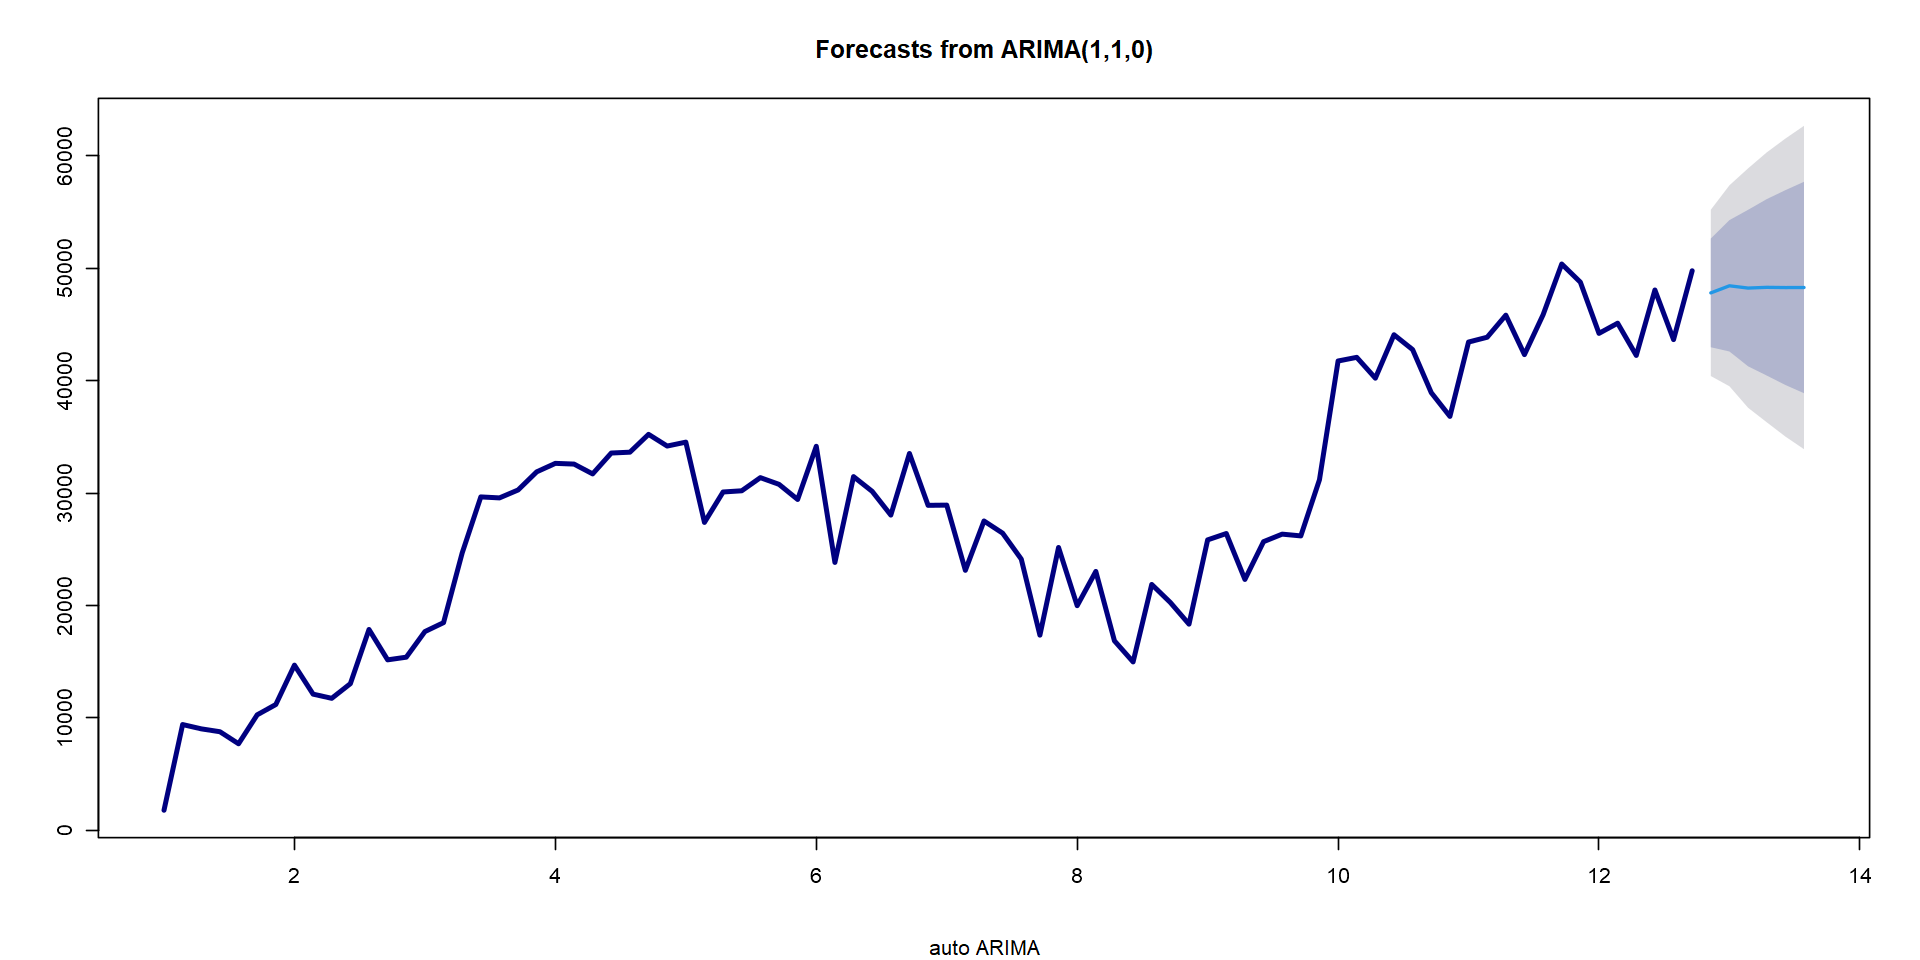

In [22]:
predict.arima.auto <- forecast(fit.arima.auto, h = 6)
plot(predict.arima.auto,
     sub = "auto ARIMA",
     col = "navyblue",
     lwd = 3)
predict.arima.auto

## Fit model - (SARIMA)

Series: bike07_2012.ts 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1     drift
      -0.3446  539.1586
s.e.   0.0964  267.8386

sigma^2 = 13834360:  log likelihood = -789.55
AIC=1585.11   AICc=1585.41   BIC=1592.33

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 32.41152 3651.619 2797.356 -0.3912738 11.49982 0.4301509
                    ACF1
Training set -0.01407575


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1) with drift
Q* = 6.9924, df = 13, p-value = 0.9025

Model df: 1.   Total lags used: 14



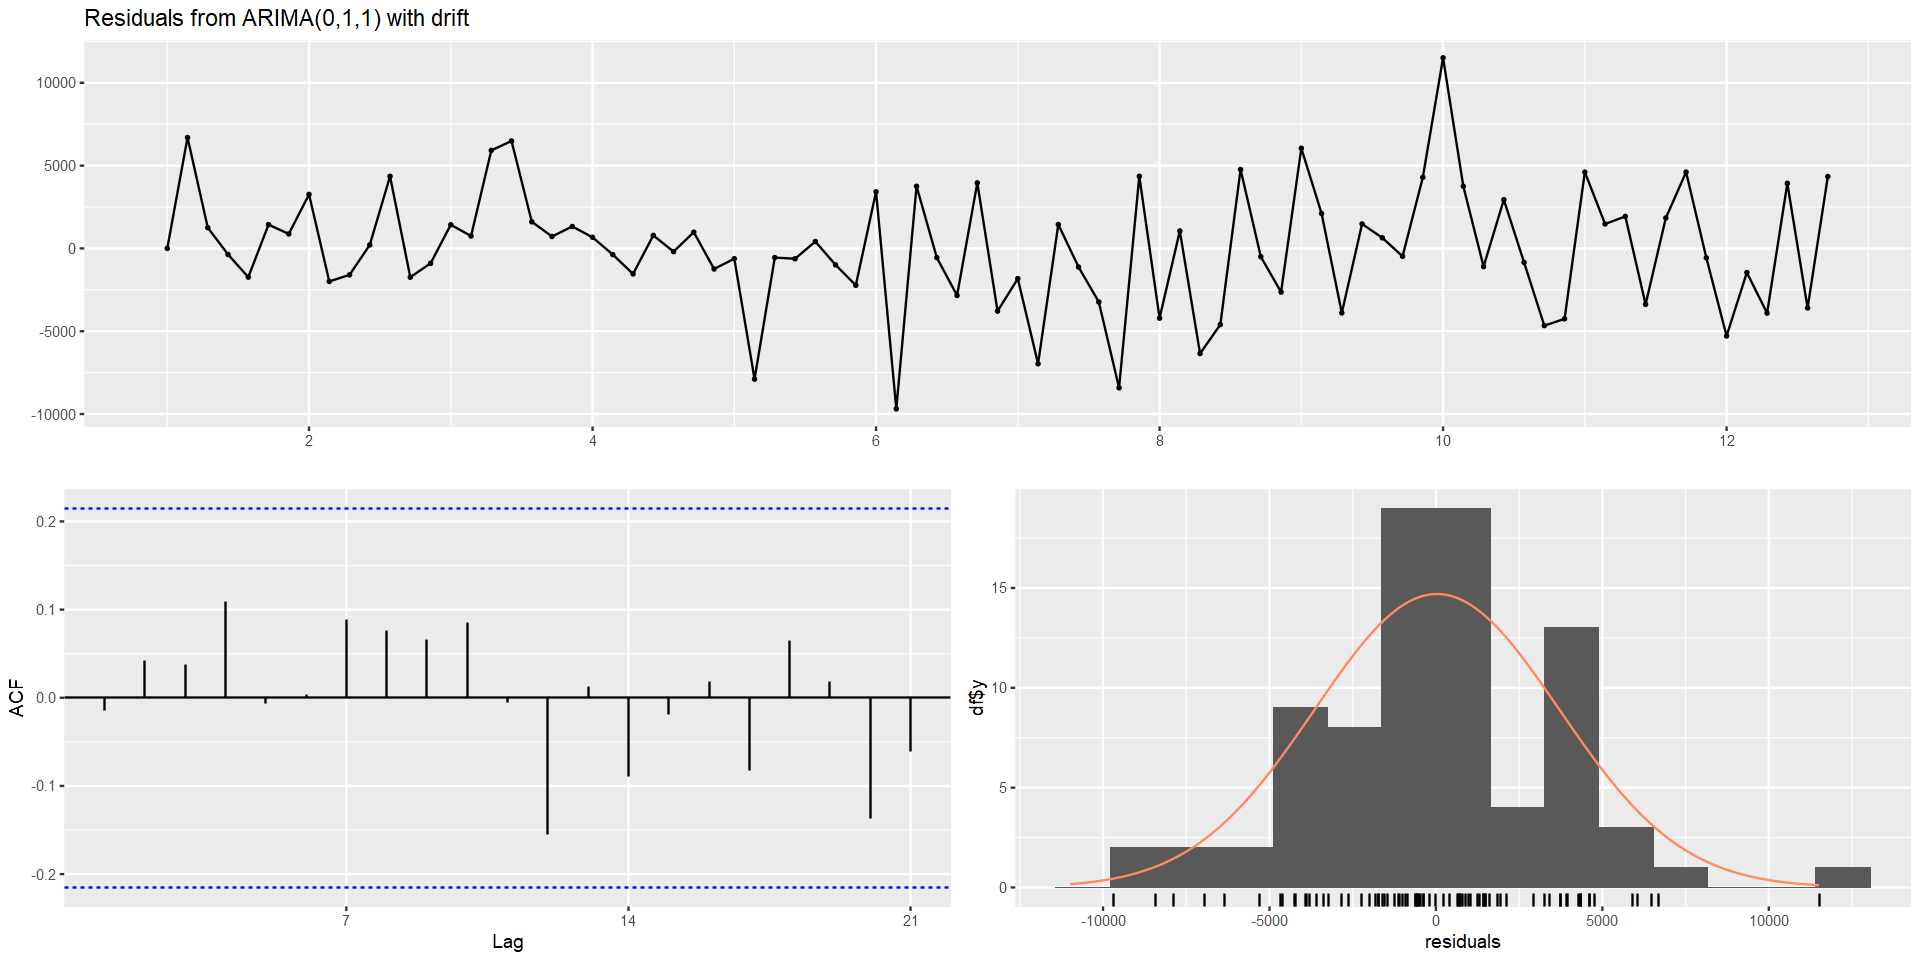

In [23]:
fit.sarima <- auto.arima(bike07_2012.ts, 
                         seasonal=TRUE, 
                         stepwise=FALSE, 
                         approximation=FALSE)
summary(fit.sarima)
checkresiduals(fit.sarima)

## Forecast for the next 6 weeks (Sarima)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
12.85714       48820.86 44054.18 53587.53 41530.86 56110.86
13.00000       49360.02 43660.92 55059.11 40644.01 58076.03
13.14286       49899.18 43400.09 56398.26 39959.68 59838.67
13.28571       50438.33 43227.47 57649.20 39410.27 61466.40
13.42857       50977.49 43119.05 58835.93 38959.05 62995.94
13.57143       51516.65 43060.09 59973.22 38583.45 64449.85


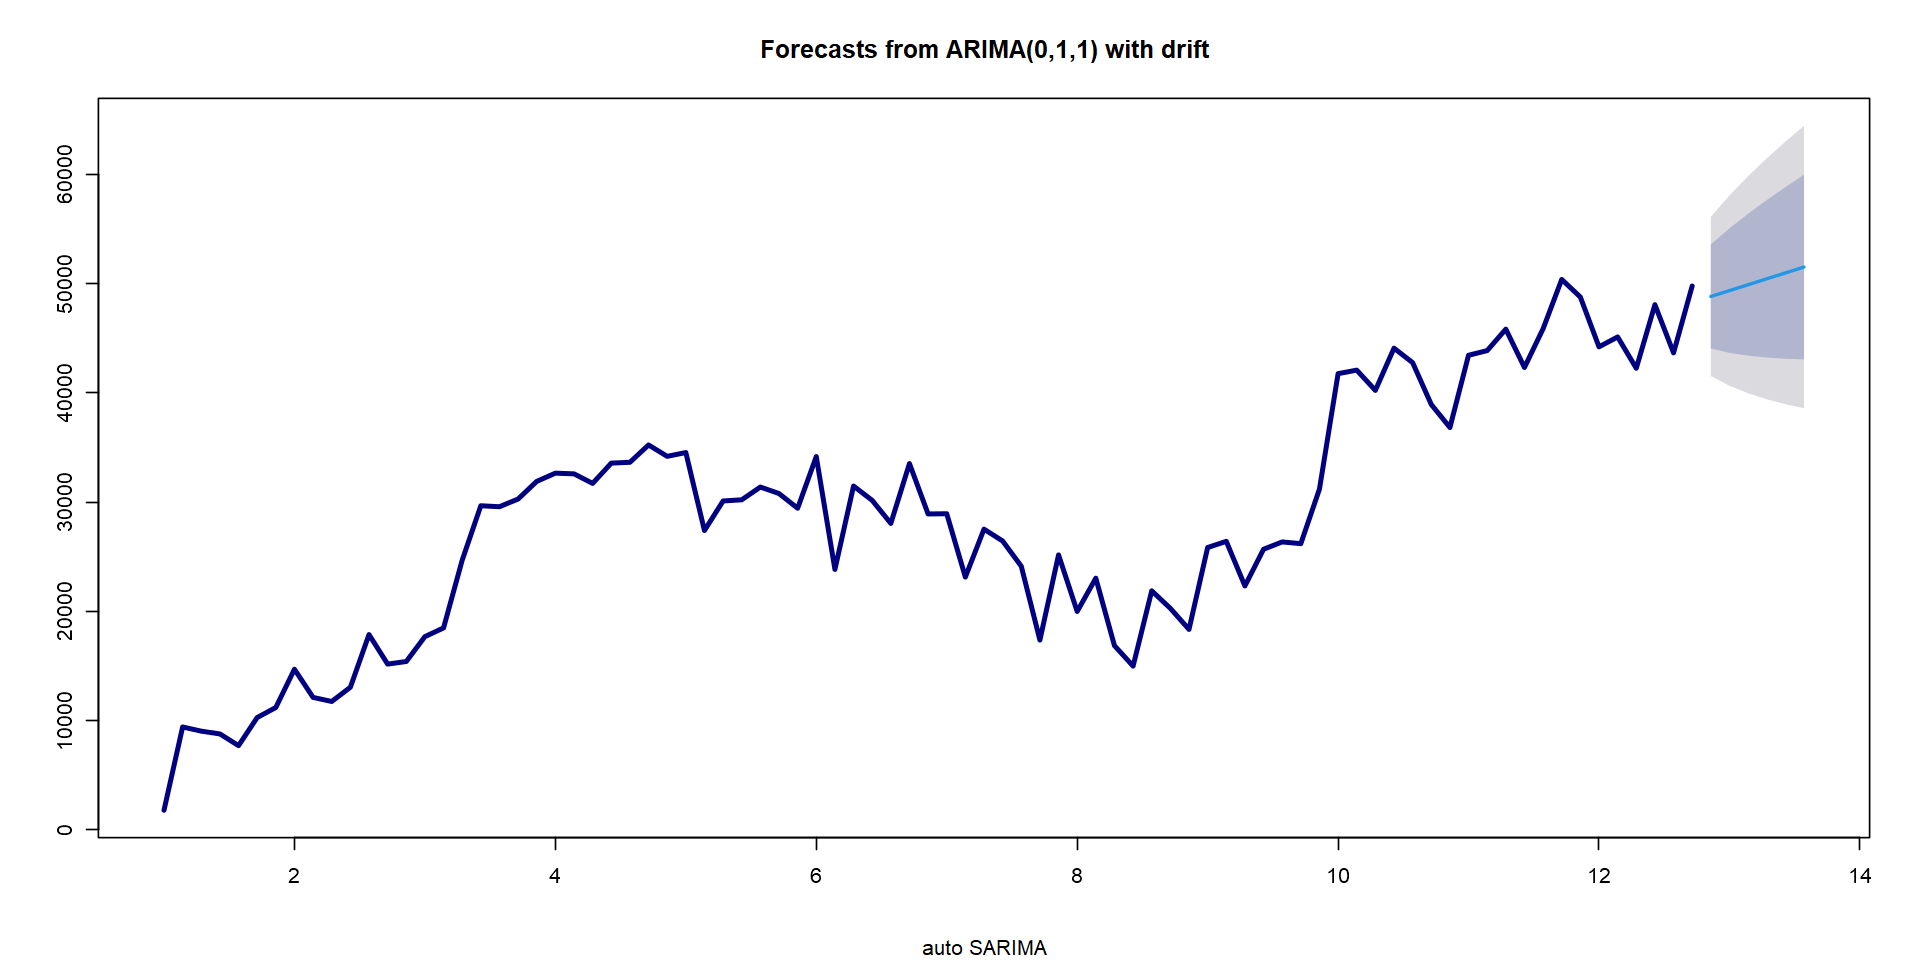

In [24]:
predict.sarima <- forecast(fit.sarima, h=6)
plot(predict.sarima,
     sub = "auto SARIMA",
     col = "navyblue",
     lwd = 3)
print(predict.sarima)

## Compare Models

In [25]:
# The best model can be chosen for the lowest AIC or BIC
#   AIC: Akaike information criterion
#   BIC: Bayesian information criterion
data.frame(AIC = round(c(fit.arima$aic, fit.arima.auto$aic, fit.sarima$aic), 1),
           BIC = round(c(fit.arima$bic, fit.arima.auto$bic, fit.sarima$bic), 1),
           row.names = c("ARIMA", "auto.ARIMA", "SARIMA"))

,AIC,BIC
,<dbl>,<dbl>
ARIMA,1594.8,1611.7
auto.ARIMA,1586.5,1591.4
SARIMA,1585.1,1592.3


## View models

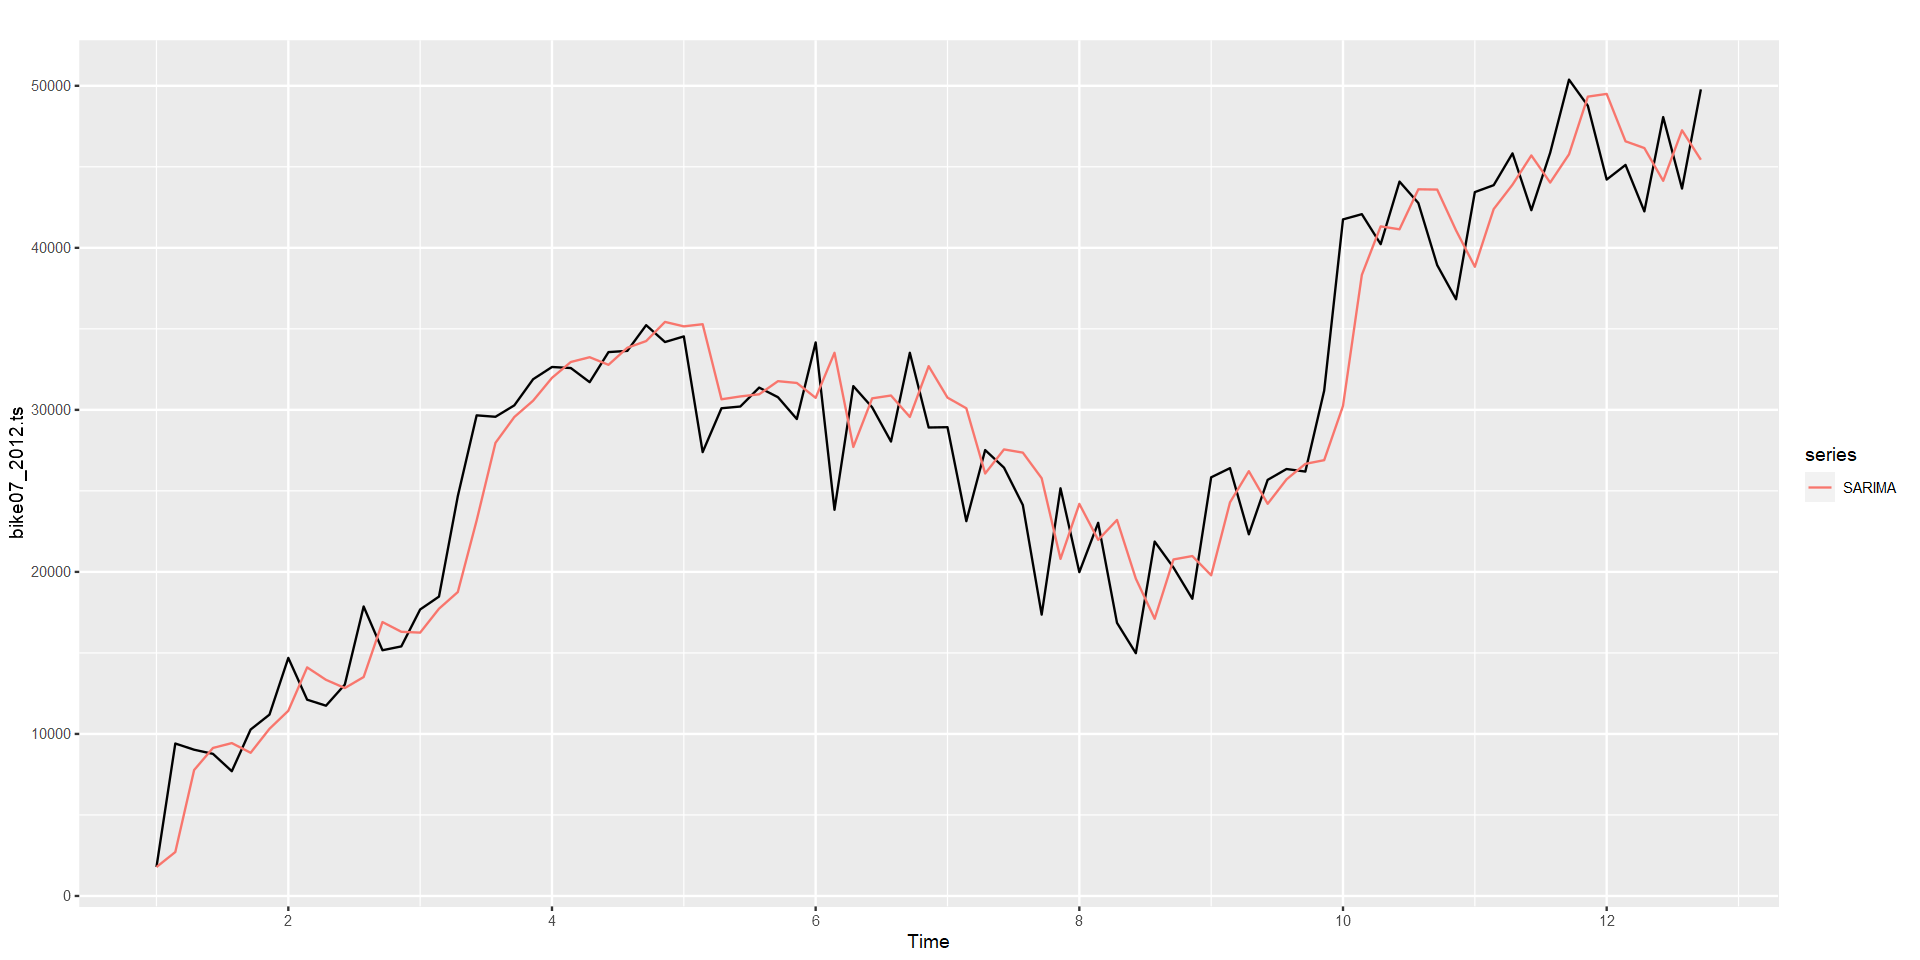

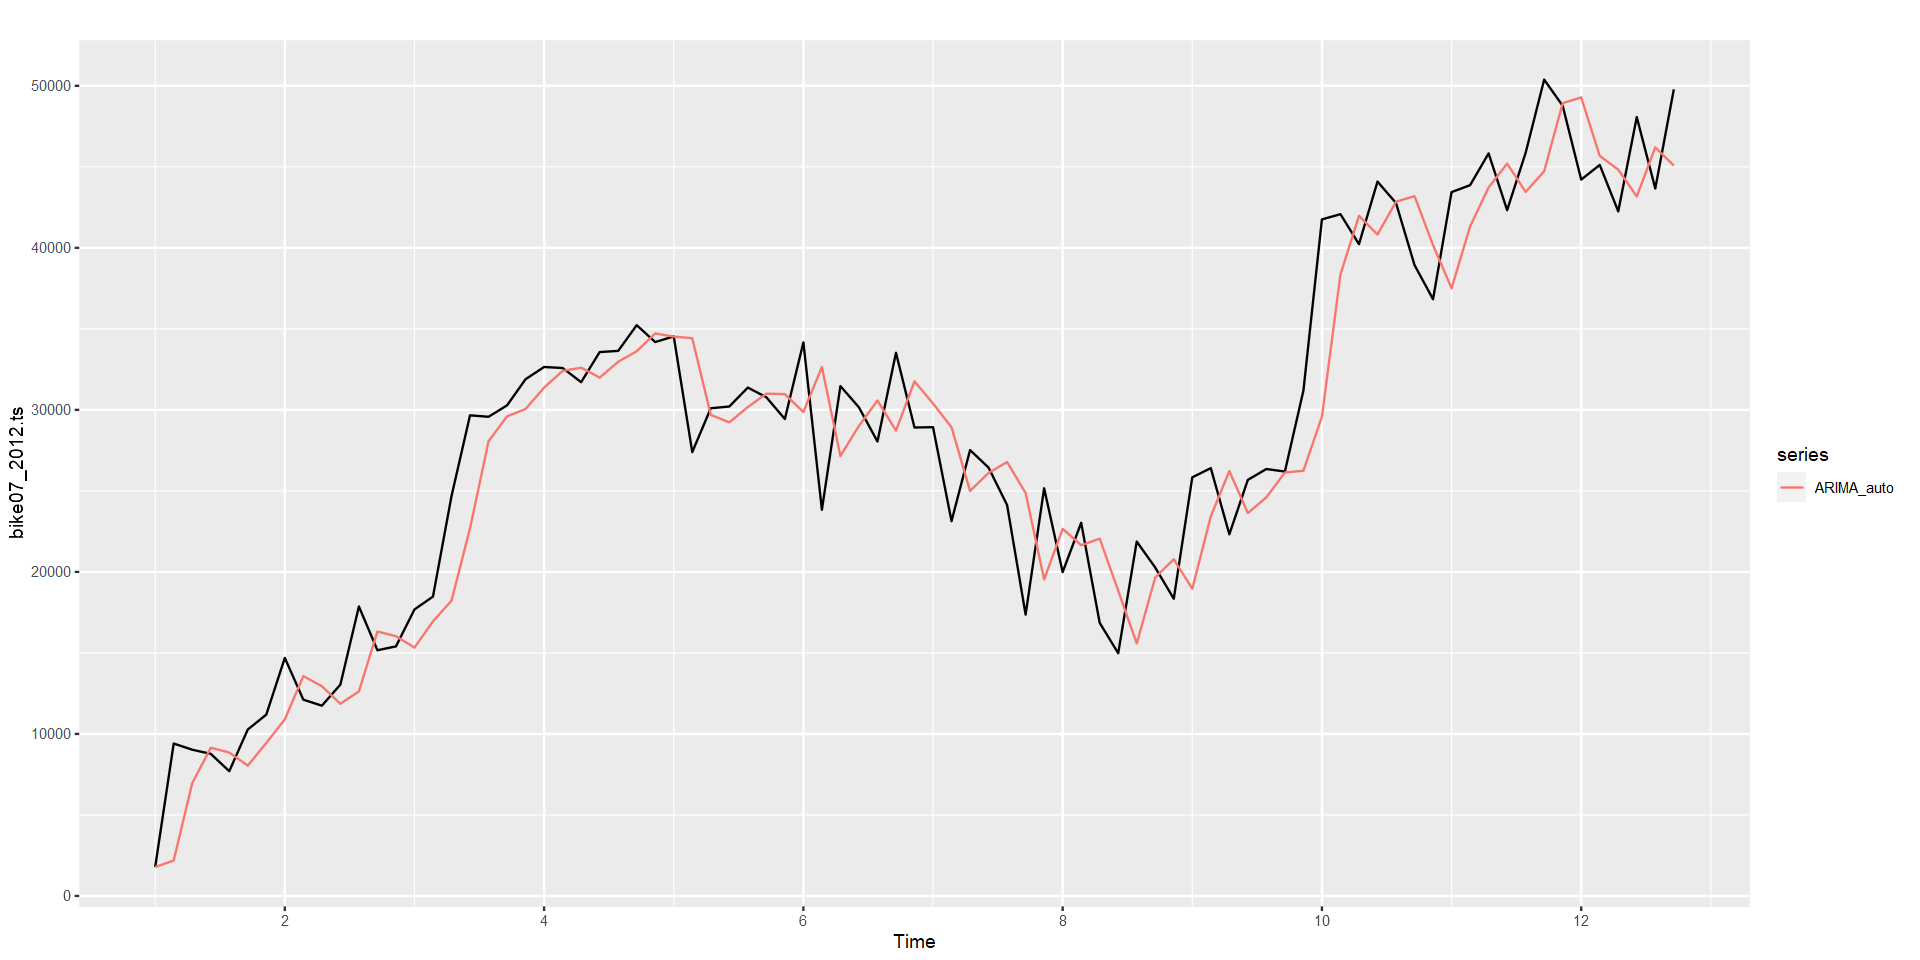

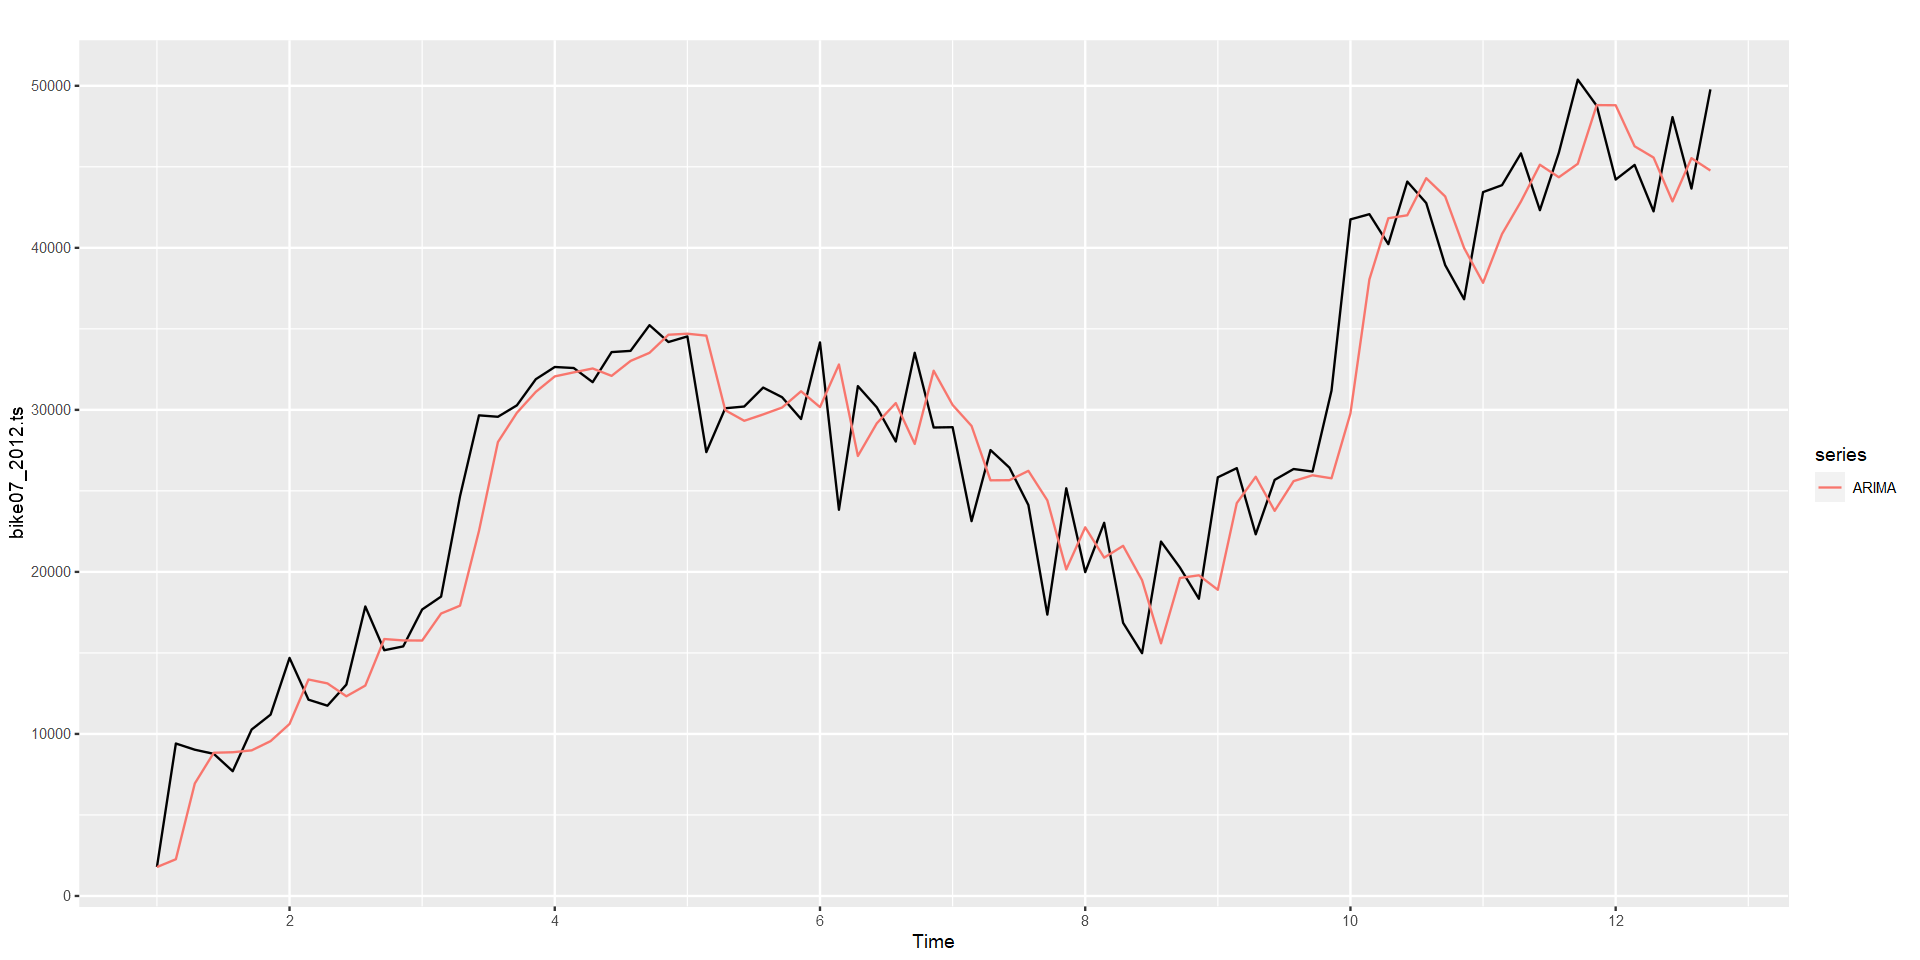

In [26]:
par(mfrow = c(1,3))
autoplot(bike07_2012.ts)+autolayer(fit.sarima$fitted, series = "SARIMA")
autoplot(bike07_2012.ts)+autolayer(fit.arima.auto$fitted, series = "ARIMA_auto")
autoplot(bike07_2012.ts)+autolayer(fit.arima$fitted, series = "ARIMA")

The model chosen, seeing the lowest value of AIC and BIC is the SARIMA.

The choice of parameter q (MA-Moving Average), is the main difference between the automatic and manual models.

When comparing the error measure (RMSE) of the 3 models, SARIMA presents the lowest value.